# Introduction to Cross-Validation - Lab

## Introduction

In this lab, you'll be able to practice your cross-validation skills!


## Objectives

You will be able to:

- Perform cross validation on a model
- Compare and contrast model validation strategies

## Let's Get Started

We included the code to pre-process the Ames Housing dataset below. This is done for the sake of expediency, although it may result in data leakage and therefore overly optimistic model metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']

## Train-Test Split

Perform a train-test split with a test set of 20% and a random state of 4.

In [2]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [3]:
# Split the data into training and test sets (assign 20% to test set)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=4, test_size=0.2)

### Fit a Model

Fit a linear regression model on the training set

In [4]:
# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [5]:
# Instantiate and fit a linear regression model
linreg = LinearRegression()
linreg.fit(X_train_1, y_train_1)

LinearRegression()

### Calculate MSE

Calculate the mean squared error on the test set

In [6]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [7]:
# Calculate MSE on test set
test_mse_1 = mean_squared_error(y_test_1, linreg.predict(X_test_1))

## Cross-Validation using Scikit-Learn

Now let's compare that single test MSE to a cross-validated test MSE.

In [13]:
# Import cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_validate

In [18]:
# Find MSE scores for a 5-fold cross-validation
cross_val_results = cross_validate(linreg, X, y, scoring=["neg_mean_squared_error"], return_train_score=True)
cross_val_results

{'fit_time': array([0.01316762, 0.01078367, 0.00700116, 0.00600171, 0.00700426]),
 'score_time': array([0.0065279 , 0.00399876, 0.00300694, 0.0029943 , 0.00300527]),
 'test_neg_mean_squared_error': array([-0.12431546, -0.19350065, -0.1891053 , -0.17079325, -0.20742705]),
 'train_neg_mean_squared_error': array([-0.1717051 , -0.15507936, -0.15659946, -0.16134558, -0.15165049])}

In [20]:
# Get the average MSE score
test_avg = -cross_val_results["test_neg_mean_squared_error"].mean()

Compare and contrast the results. What is the difference between the train-test split and cross-validation results? Do you "trust" one more than the other?

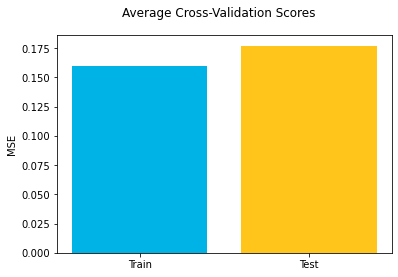

In [30]:
# Your answer here
import matplotlib.pyplot as plt
import pandas as pd

train_avg = -cross_val_results["train_neg_mean_squared_error"].mean()
labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]
fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

## Level Up: Let's Build It from Scratch!

### Create a Cross-Validation Function

Write a function `kfolds(data, k)` that splits a dataset into `k` evenly sized pieces. If the full dataset is not divisible by `k`, make the first few folds one larger then later ones.

For example, if you had this dataset:

In [ ]:
example_data = pd.DataFrame({
    "color": ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
})
example_data

`kfolds(example_data, 3)` should return:

* a dataframe with `red`, `orange`, `yellow`
* a dataframe with `green`, `blue`
* a dataframe with `indigo`, `violet`

Because the example dataframe has 7 records, which is not evenly divisible by 3, so the "leftover" 1 record extends the length of the first dataframe.

In [ ]:
def kfolds(data, k):
    folds = []
    
    # Your code here
    
    return folds

In [ ]:
results = kfolds(example_data, 3)
for result in results:
    print(result, "\n")

### Apply Your Function to the Ames Housing Data

Get folds for both `X` and `y`.

In [ ]:
# Apply kfolds() to ames_data with 5 folds


### Perform a Linear Regression for Each Fold and Calculate the Test Error

Remember that for each fold you will need to concatenate all but one of the folds to represent the training data, while the one remaining fold represents the test data.

In [ ]:
# Replace None with appropriate code
test_errs = []
k = 5

for n in range(k):
    # Split into train and test for the fold
    X_train = None
    X_test = None
    y_train = None
    y_test = None
    
    # Fit a linear regression model
    None
    
    # Evaluate test errors
    None

print(test_errs)

If your code was written correctly, these should be the same errors as scikit-learn produced with `cross_val_score` (within rounding error). Test this out below:

In [ ]:
# Compare your results with sklearn results


This was a bit of work! Hopefully you have a clearer understanding of the underlying logic for cross-validation if you attempted this exercise.

##  Summary 

Congratulations! You are now familiar with cross-validation and know how to use `cross_val_score()`. Remember that the results obtained from cross-validation are more robust than train-test split.